In [53]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler  # doctest: +SKIP
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from silhouette import silhouette
import matplotlib.cm as cm
from sklearn.decomposition import FastICA

%matplotlib inline


In [2]:
X = pd.read_pickle('../homework1/X.pkl')
y = pd.read_pickle('../homework1/y.pkl')
income = pd.read_csv('../homework1/adult.csv')

In [3]:
country_counts = income['native.country'].value_counts()
country_counts_df = country_counts.to_frame(name='counts')
small = list(country_counts_df[country_counts_df.counts<100].index)
income_modified = income.copy()
income_modified.loc[income['native.country'].apply(lambda x:x in small+['?']),['native.country']] = 'other'
income_modified.loc[income_modified.workclass.apply(lambda x:x in ['?']),['occupation','workclass']] = ('other','other')

income_modified.drop(['fnlwgt','education','income'],axis=1,inplace=True)

le = preprocessing.LabelEncoder()

for item in income_modified.columns[income_modified.dtypes==object]:
    income_modified[item] = le.fit_transform(income_modified[item])

income_modified_stan = StandardScaler().fit_transform(income_modified)
pos = income_modified_stan[(income['capital.gain']>0)|(income['capital.gain']>0)]

In [6]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


In [4]:
X_stan = StandardScaler().fit_transform(X)


In [12]:
kmeans = KMeans(n_clusters=9, random_state=0)
kmeans.fit(X_stan)

KMeans(n_clusters=9, random_state=0)

In [27]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

1    28460
6     1485
0      752
5      635
7      520
3      493
2      159
4       57
Name: labels, dtype: int64

In [97]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [15]:
sum(kmeans.labels_)

159

In [17]:
kmeans.labels_.var()

0.004859297329838416

In [34]:
kmeans.cluster_centers_[0].shape

(59,)

In [35]:
X.shape

(32561, 59)

In [5]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=9, random_state=10)
gm.fit(X_stan)

GaussianMixture(n_components=9, random_state=10)

In [99]:
pd.DataFrame(gm.fit_predict(X_stan),columns=['label']).label.value_counts()

2    11655
1     7049
5     5117
3     3148
4     2487
6     1986
0      914
8      198
7        7
Name: label, dtype: int64

In [100]:
pd.DataFrame(kmeans.labels_,columns=['labels']).labels.value_counts()

4    10507
2     9509
0     6470
5     1826
7     1569
1     1361
3     1114
6      198
8        7
Name: labels, dtype: int64

In [101]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
kmeans.labels_[[0,2]]

array([5, 5])

In [113]:
pd.DataFrame(kmeans.labels_[X['native.country_Canada']==1])[0].value_counts()

4    38
2    32
0    21
5    14
7     8
3     6
1     2
Name: 0, dtype: int64

In [115]:
pd.DataFrame(kmeans.labels_[X['native.country_other']==1])[0].value_counts()

4    631
2    584
0    419
5    100
3     95
1     84
7     59
Name: 0, dtype: int64

In [8]:
gm.bic(X_stan)

-5461387.248276959

In [19]:
ks = [2,4,6,8,15,20,200,2000]

2
27.28824257850647
4
62.715173959732056
6
103.96269369125366
8
161.2387204170227
10
200.37051463127136


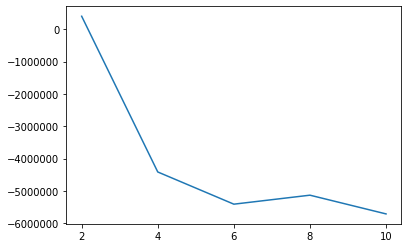

In [60]:
import time

d = X_stan

start = time.time()
ks = [2,4,6,8,10]
total = []
scores = []
for k in ks:
    print(k)
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(d)
    total.append(gms.aic(d))
    cluster_labels = gms.fit_predict(d)
    scores.append(silhouette_score(d, cluster_labels))

    print(time.time()-start)
plt.xticks(range(0,5), ks)
plt.plot(total)

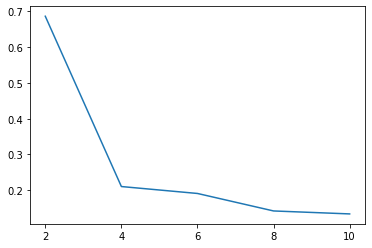

In [55]:
plt.xticks(range(0,5), ks)
plt.plot(scores)


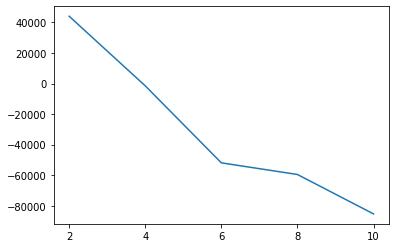

In [56]:
plt.xticks(range(0,5), ks)
plt.plot(total)

In [21]:
cluster_labels = gms.fit_predict(pos)
silhouette_avg = silhouette_score(pos, cluster_labels)

In [23]:
silhouette_avg

0.03870214896007703

In [127]:
gm.bic(X_stan)

-5461387.248267755

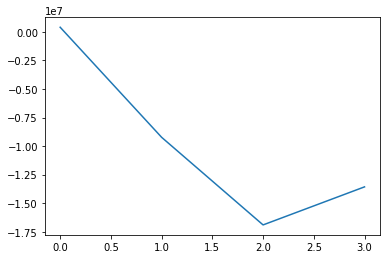

In [21]:
plt.plot(total)

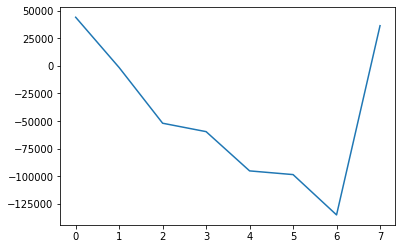

In [11]:
plt.plot(total)

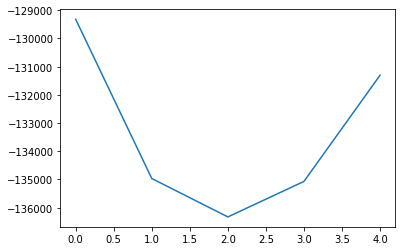

In [13]:
plt.plot(total)

In [22]:
total

[404155.31543551694,
 -9233085.073935254,
 -16905036.02515985,
 -13573377.643168036]

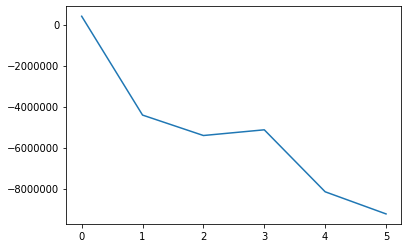

In [18]:
plt.plot(total)

In [15]:
total

[404155.31543551694,
 -4414096.212592142,
 -5410495.864073624,
 -5132498.955486961]

In [11]:
total

[434857.51071274735,
 -4352683.431167149,
 -5318372.496500868,
 -5009665.001766442]

In [37]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(32561, 2)

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
n_neighbors=2

fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


Text(0.5,0.98,'Manifold Learning with 1000 points, 2 neighbors')

<Figure size 1080x576 with 0 Axes>

In [48]:
from sklearn import manifold, datasets

n_points = 1000
X1, color = datasets.make_s_curve(32561, random_state=0)

In [49]:
color

array([ 0.46005644,  2.028112  ,  0.968522  , ...,  1.21266926,
       -1.72622701,  3.92248014])

In [53]:
i=0
ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)
#ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')


(-96.01885854184566, 94.52276479184572, -96.44877498336895, 96.06880061813457)

In [52]:
X_embedded[:, 0]

array([ 13.125074,  13.12485 ,  13.125004, ...,  35.173664,  50.48359 ,
       -35.992203], dtype=float32)

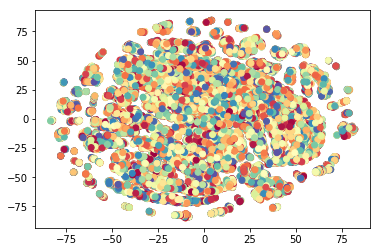

In [54]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap=plt.cm.Spectral)

In [56]:
X_embedded.shape

(32561, 2)

In [57]:
X_embedded[:10]

array([[ 13.125074, -74.85138 ],
       [ 13.12485 , -74.8513  ],
       [ 13.125004, -74.8514  ],
       [ 13.147255, -74.8633  ],
       [ 13.147282, -74.86335 ],
       [ 13.158456, -74.87092 ],
       [ 13.158326, -74.87084 ],
       [ 13.169389, -74.87893 ],
       [ 13.169538, -74.879005],
       [ 14.169823, -75.68437 ]], dtype=float32)

In [46]:
income = pd.read_csv('../homework1/adult.csv')

In [60]:
income.na

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [66]:
gm.fit_predict(X).size

32561

In [65]:
kmeans.labels_.size

32561

In [67]:
kmeans.cluster_centers_

array([[ 4.49015957e+01,  1.14428191e+01,  7.83119681e+03,
         1.40687462e-12,  4.43577128e+01,  5.18617021e-02,
         9.30851064e-02,  1.40946282e-18,  6.13031915e-01,
         6.51595745e-02,  9.04255319e-02,  5.31914894e-02,
         2.81892565e-18,  3.32446809e-02,  8.37765957e-02,
         1.32978723e-03,  7.81914894e-01,  5.31914894e-03,
         9.97340426e-02,  1.19680851e-02,  1.59574468e-02,
         8.90957447e-02,  4.39101880e-18,  1.19680851e-01,
         2.35372340e-01,  2.39361702e-02,  1.46276596e-02,
         3.19148936e-02,  1.40946282e-18,  2.39361702e-02,
         8.32667268e-17,  2.24734043e-01,  2.12765957e-02,
         1.14361702e-01,  2.26063830e-02,  4.52127660e-02,
         3.32446809e-02,  6.94148936e-01,  1.39627660e-01,
         6.64893617e-03,  2.12765957e-02,  5.71808511e-02,
         8.11170213e-02,  7.97872340e-03,  2.92553191e-02,
         6.25000000e-02,  5.31914894e-03,  8.94946809e-01,
         1.79521277e-01,  8.20478723e-01,  3.98936170e-0

In [91]:
kmeans.cluster_centers_

array([[-8.09759290e-02,  1.13616720e-01, -5.45911907e-02,
        -3.10696539e-02,  4.37958117e-02,  4.60364702e-02,
         2.50801410e-02, -1.46638105e-02,  2.58241186e-01,
        -6.18588179e-02, -2.81740534e-01,  5.74847829e-02,
        -2.07399897e-02, -2.44450198e-01,  4.33973789e-01,
        -2.65869483e-02, -9.20916156e-01,  9.04530986e-02,
         5.52330386e-01,  1.03793144e-01,  1.34223956e-01,
         1.30623178e-01,  1.63441757e-02, -9.24124749e-02,
        -9.63902247e-04, -7.31091389e-02, -2.77271700e-03,
         7.33215277e-04, -1.46638105e-02,  8.24548435e-02,
         6.21338502e-02,  1.00397221e-01, -8.29639299e-03,
        -7.85524448e-03,  5.43529014e-02, -4.37409647e-02,
        -2.44450198e-01, -8.25333347e-01,  1.70804794e+00,
        -1.75448130e-01, -4.28589866e-01, -3.44032316e-01,
        -2.24926808e-01, -9.82008699e-02, -3.81030984e-02,
         1.43335897e-02,  4.91678373e-03,  3.28205715e-02,
         3.04587093e-01, -3.04587093e-01,  8.73735220e-0

In [94]:
X_stan[0].shape

(59,)

In [68]:
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 8,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [50]:
X_standard = X_stan.copy()

For n_clusters = 2 The average silhouette_score is : 0.08171694863868836
For n_clusters = 4 The average silhouette_score is : 0.0858816062531556
For n_clusters = 6 The average silhouette_score is : 0.09556409402257389
For n_clusters = 8 The average silhouette_score is : 0.07691835098548624


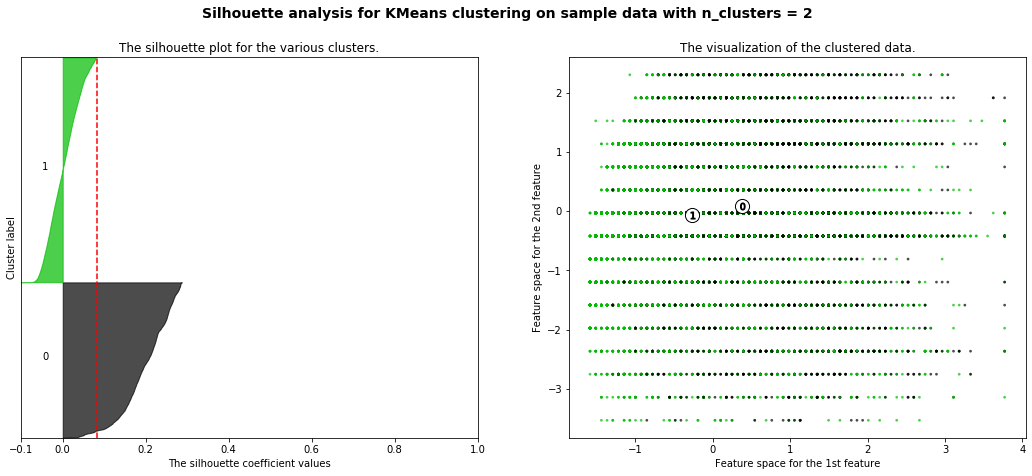

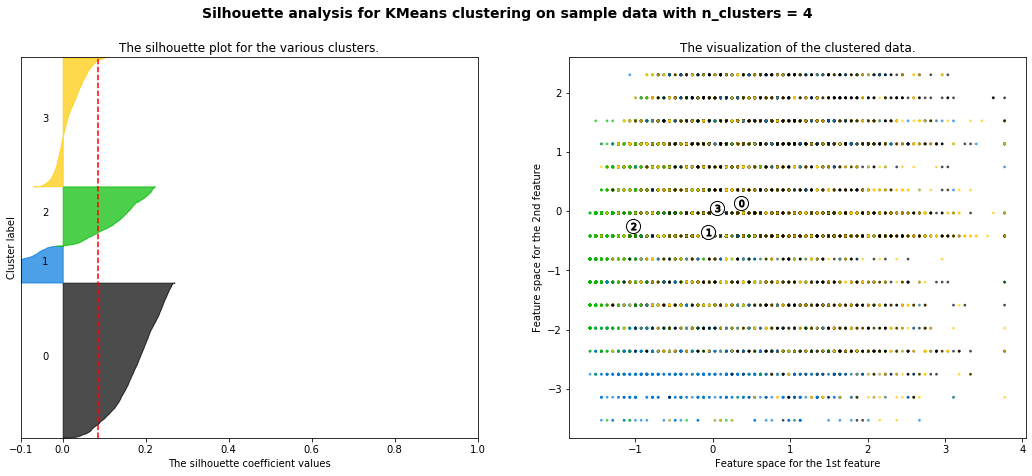

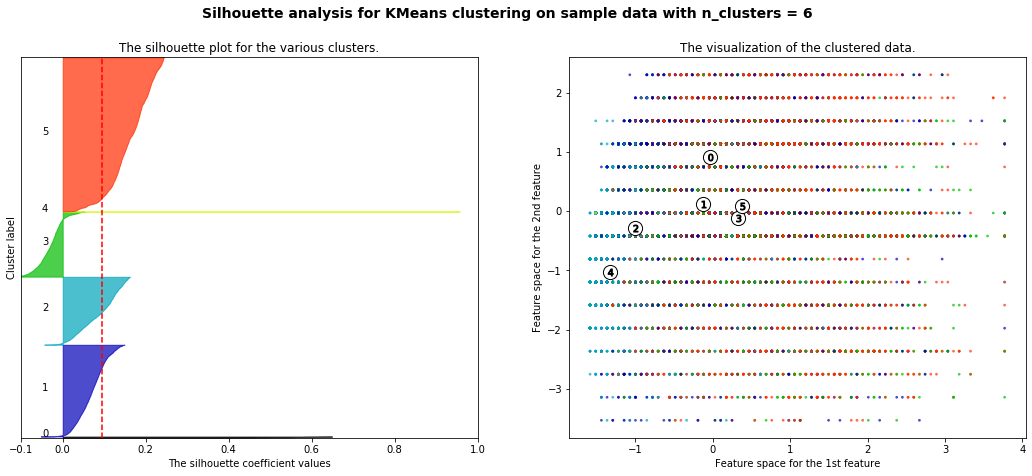

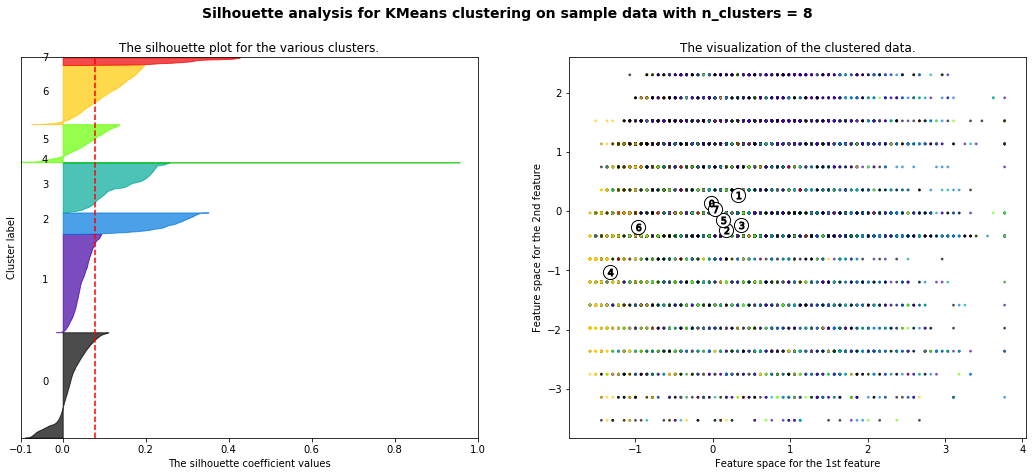

In [27]:
import matplotlib.cm as cm

range_n_clusters = [2, 4,  6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_stan) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_stan)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_stan, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_stan, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_stan[:, 0], X_stan[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

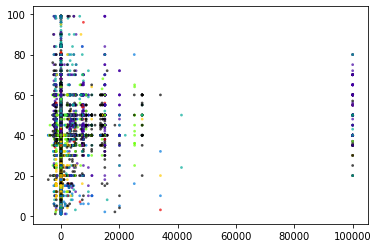

In [43]:
plt.scatter(X.iloc[:,2]-X.iloc[:, 3], X.iloc[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

In [58]:
income[(income['capital.gain']>0)|(income['capital.gain']>0)].shape

(2712, 15)

In [71]:
from silhouette import silhouette

1
2
For n_clusters = 2 The average silhouette_score is : 0.6866712759041652
1
2
For n_clusters = 4 The average silhouette_score is : 0.15488300271215696
1
2
For n_clusters = 6 The average silhouette_score is : 0.16887262333301237
1
2
For n_clusters = 8 The average silhouette_score is : 0.168037432132915


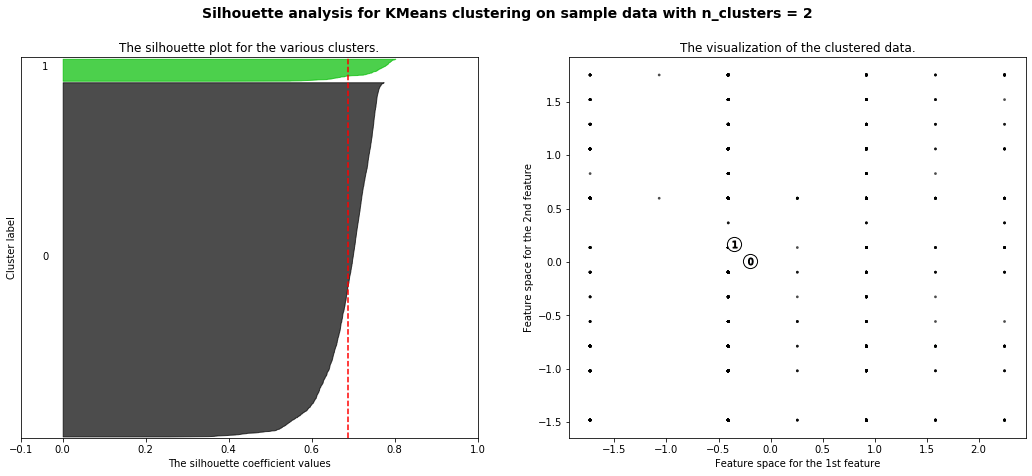

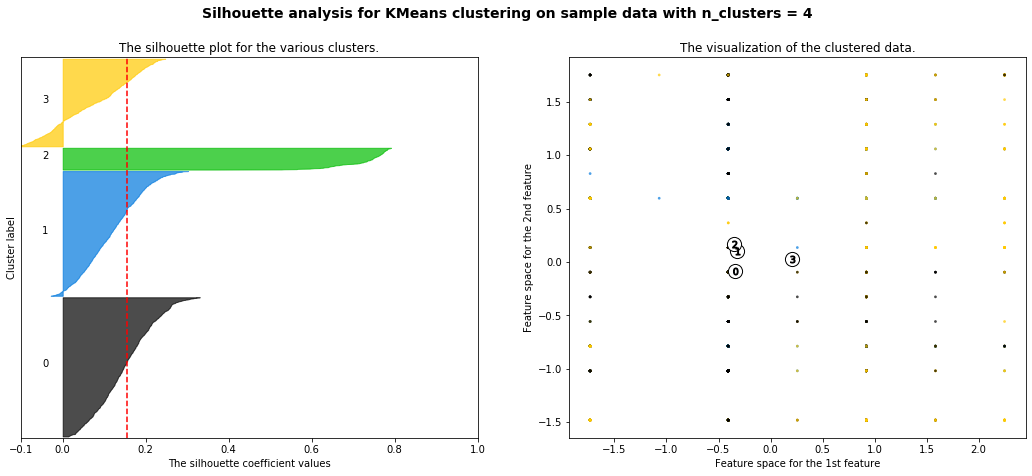

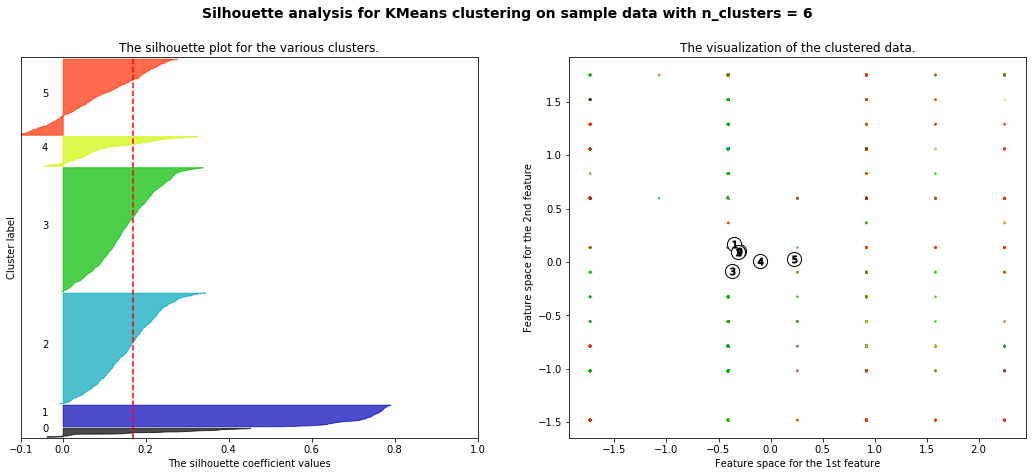

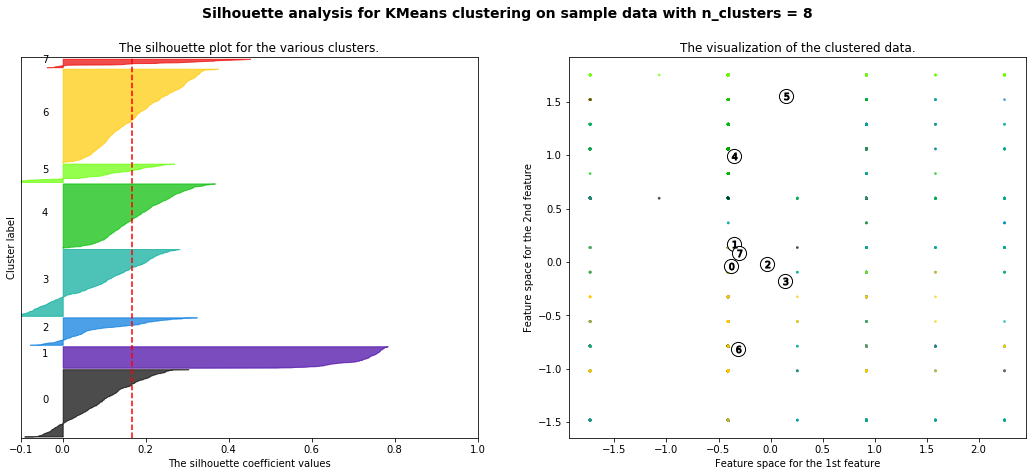

In [88]:
silhouette(pos,columns=[3,4])

1
2
For n_clusters = 2 The average silhouette_score is : 0.1652386576016733
1
2
For n_clusters = 4 The average silhouette_score is : 0.17492975757250373
1
2
For n_clusters = 6 The average silhouette_score is : 0.15894155185409176
1
2
For n_clusters = 8 The average silhouette_score is : 0.18507338932677941


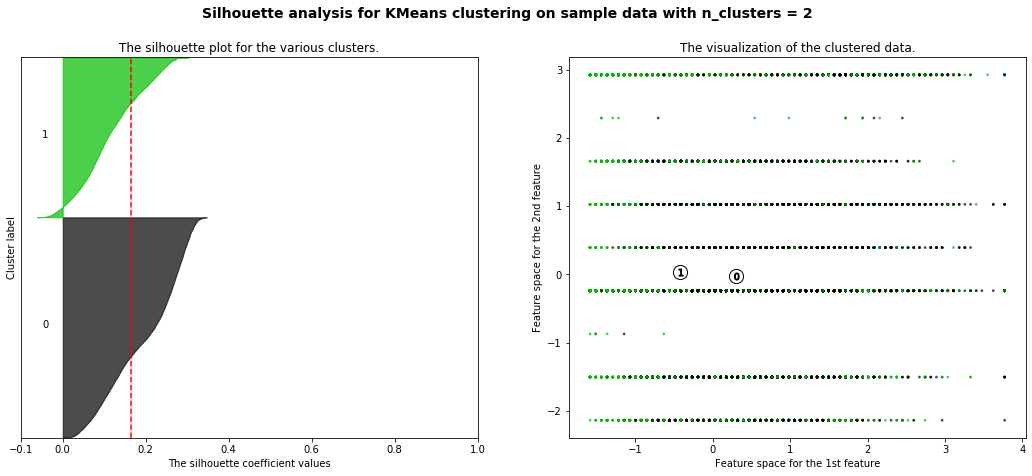

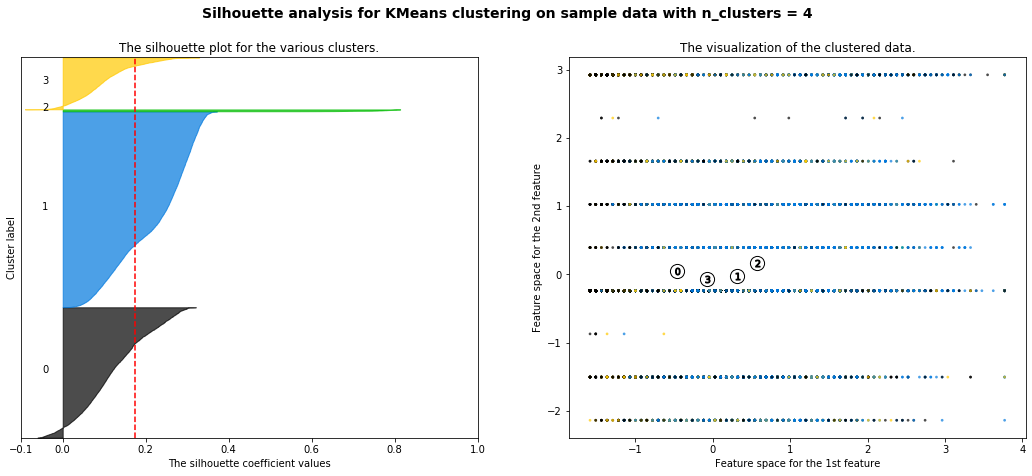

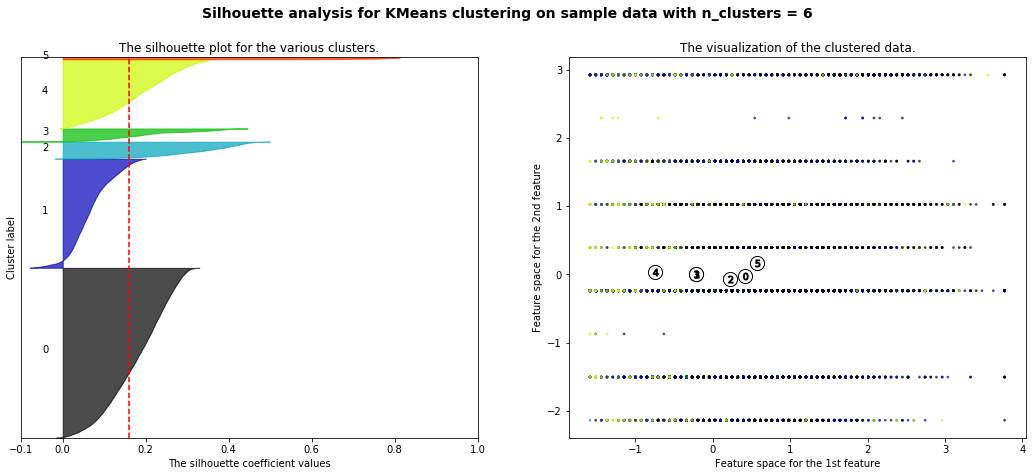

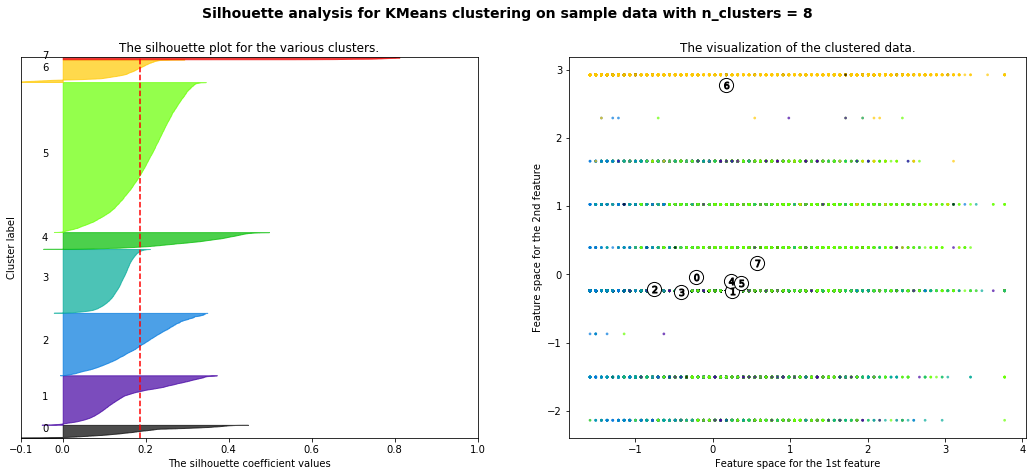

In [56]:
silhouette(income_modified_stan)

In [75]:
x_np = X.to_numpy()
x_np = x_np[(X['capital.gain']>0)|(X['capital.loss'])>0]

For n_clusters = 2 The average silhouette_score is : 0.9372089629808373
For n_clusters = 4 The average silhouette_score is : 0.667820929451939
For n_clusters = 6 The average silhouette_score is : 0.7705785011270774
For n_clusters = 8 The average silhouette_score is : 0.7692352273437891


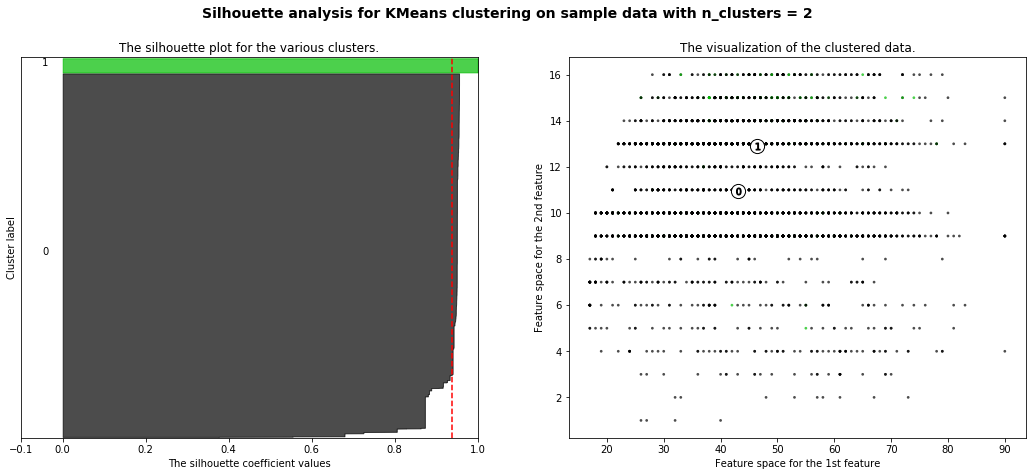

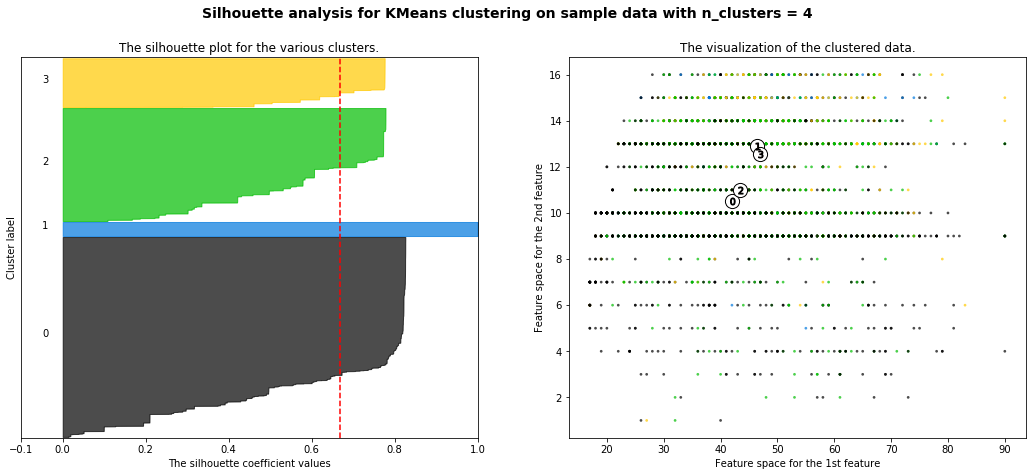

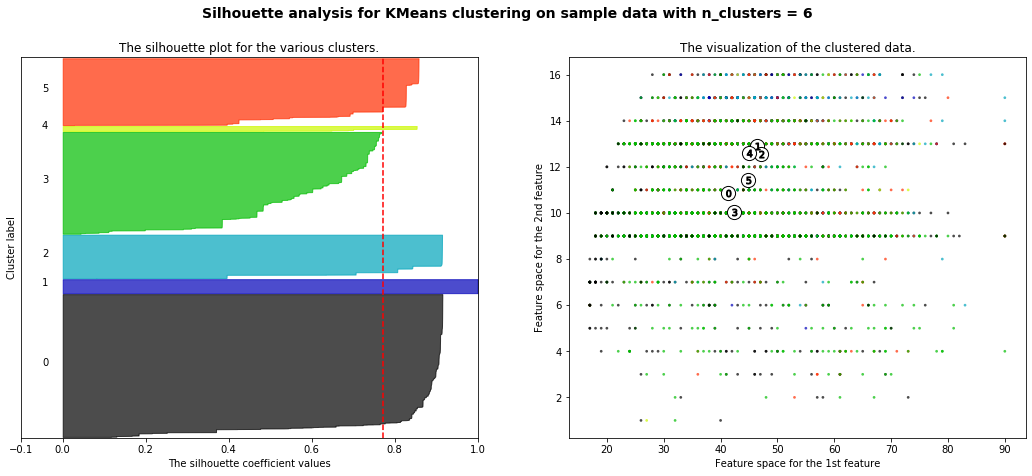

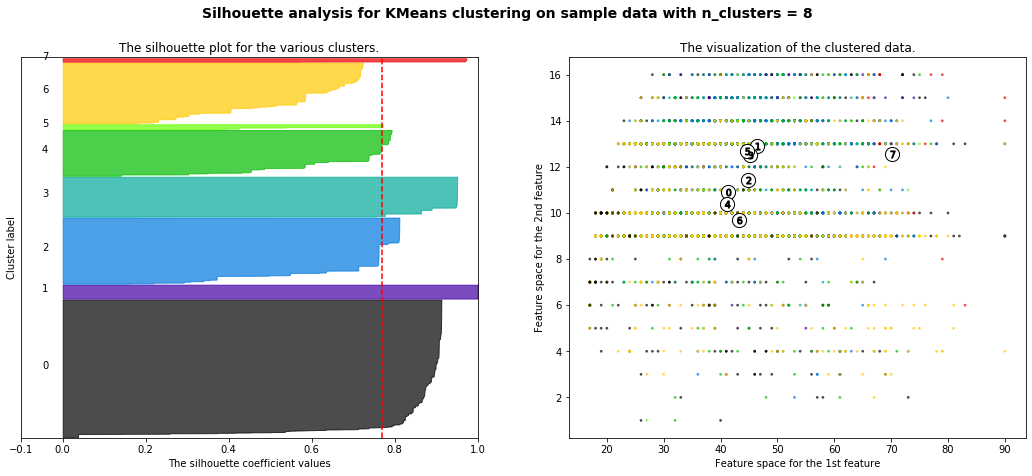

In [76]:
silhouette(x_np,range_n_clusters=[2,4,6,8])#,columns=[3,4])

For n_clusters = 2 The average silhouette_score is : 0.9372089629808373
For n_clusters = 4 The average silhouette_score is : 0.667820929451939
For n_clusters = 6 The average silhouette_score is : 0.7705785011270774
For n_clusters = 8 The average silhouette_score is : 0.7692352273437891


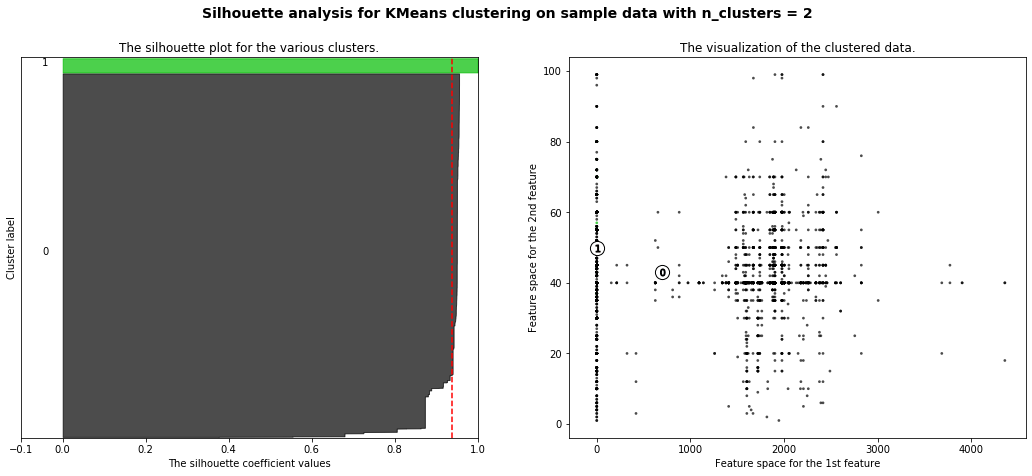

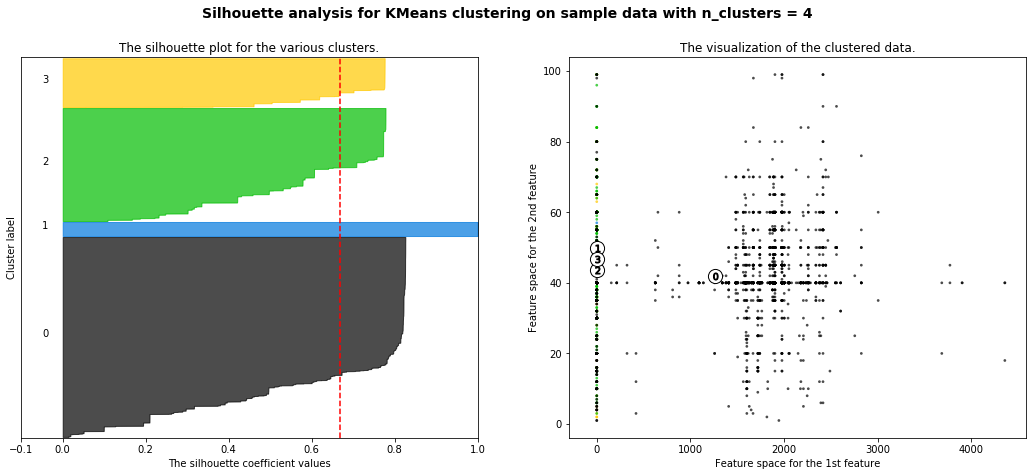

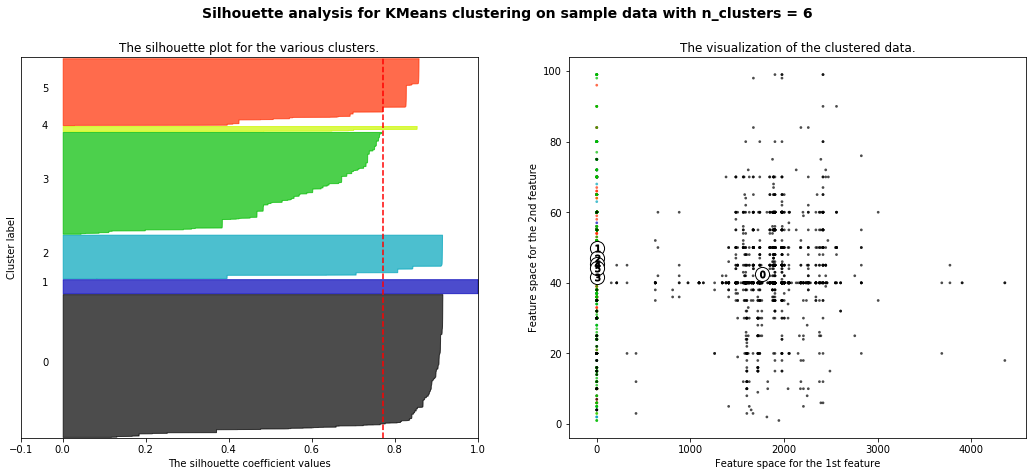

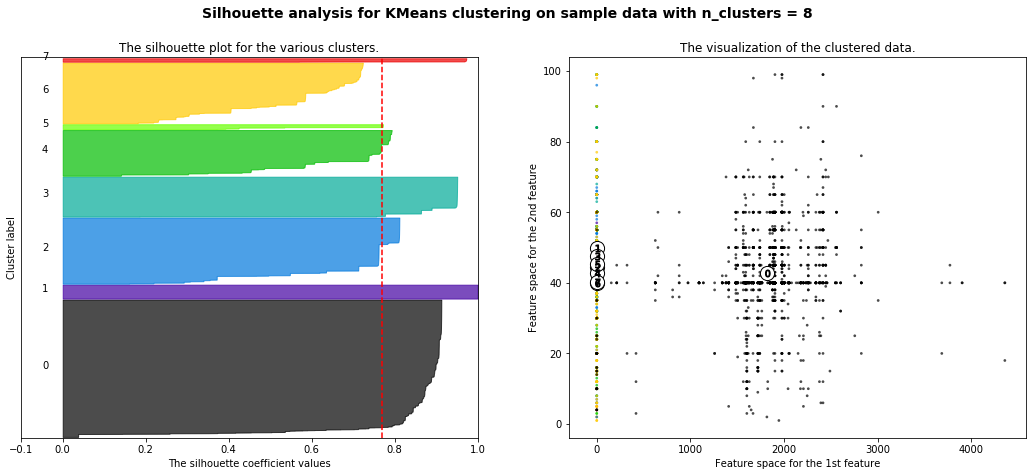

In [78]:
silhouette(x_np,range_n_clusters=[2,4,6,8],columns=[3,4])

In [57]:
income_modified_stan[0]

array([ 3.76961234,  2.92262342, -0.42005962,  2.24948009,  1.75152457,
       -0.27780504,  0.39366753, -1.42233076, -0.14592048, 10.59350656,
       -0.03542945,  0.11053875])

In [58]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


In [61]:
ks = [2,4,6,8,15,20,200,2000]
total = []
for k in ks:
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(income_modified_stan)
    total.append(gms.aic(income_modified_stan))

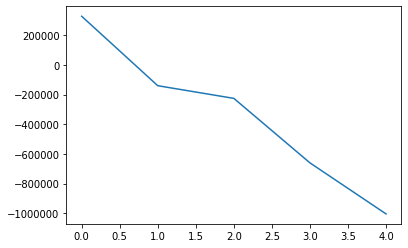

In [66]:
plt.plot(total[:5])

In [ ]:
import time
start = time.time()
ks = [20,200,500,1000,2000,2500]
total = []
for k in ks:
    gms = GaussianMixture(n_components=k, random_state=10)
    gms.fit(income_modified_stan)
    total.append(gms.aic(income_modified_stan))
print(time.time()-start)

In [68]:
pos = income_modified_stan[(income['capital.gain']>0)|(income['capital.gain']>0)]

For n_clusters = 100 The average silhouette_score is : 0.17025050375575018
For n_clusters = 300 The average silhouette_score is : 0.18819617151341902
For n_clusters = 500 The average silhouette_score is : 0.1899881677977891


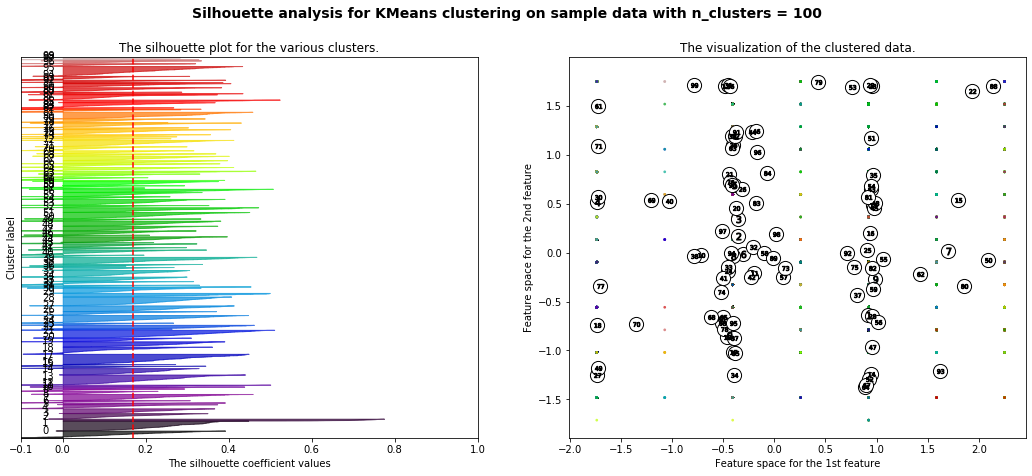

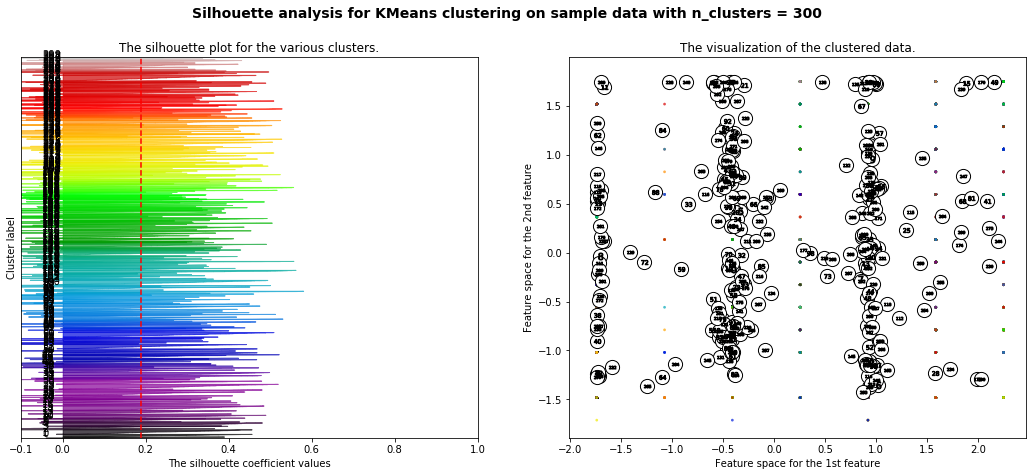

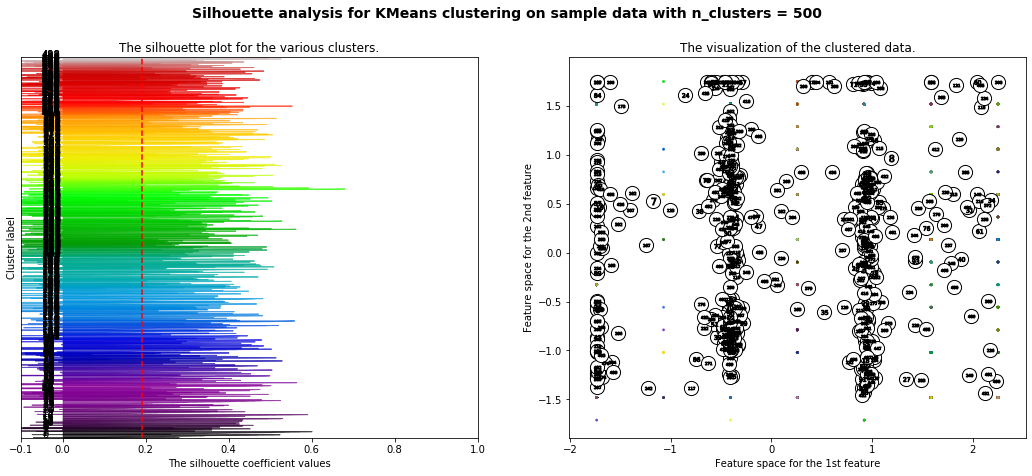

In [16]:
silhouette(income_modified_stan,range_n_clusters=[100,300,500],columns=[3,4])

In [70]:
income_modified.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,8,9,6,15,1,4,0,0,4356,40,7
1,82,3,9,6,4,1,4,0,0,4356,18,7
2,66,8,10,6,15,4,2,0,0,4356,40,7
3,54,3,4,0,7,4,4,0,0,3900,40,7
4,41,3,10,5,10,3,4,0,0,3900,40,7


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


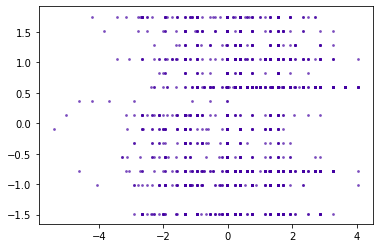

In [87]:
    plt.scatter(pos[:,2]-pos[:, 3], pos[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

In [78]:
colors = cm.nipy_spectral(1 / 8)


In [85]:
income_modified.iloc[:,2].shape

(32561,)

## running with 6 clusters

In [6]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_label = kmeans.fit_predict(X_stan)

In [7]:
gm = GaussianMixture(n_components=6, random_state=0)
gm_label = gm.fit_predict(X_stan)

In [82]:
X.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,sex_Male,native.country_Canada,native.country_El-Salvador,native.country_Germany,native.country_India,native.country_Mexico,native.country_Philippines,native.country_Puerto-Rico,native.country_United-States,native.country_other
0,90,9,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,0,4356,18,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,66,10,0,4356,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,41,10,0,3900,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
results = pd.concat([income_modified,pd.DataFrame(kmeans_label,columns=['kmeans']),pd.DataFrame(gm_label,columns=['EM'])],
                    axis=1)

In [125]:
rr = pd.DataFrame(np.stack((y.to_numpy(),kmeans_label,gm_label)).T,columns = ['label','kmeans','EM'])
rr.head()

,label,kmeans,EM
0,0,4,0
1,0,0,0
2,0,4,0
3,0,0,3
4,0,0,2


In [128]:
for i in range(6):
    print(rr[rr.EM==i].label.value_counts())

0    4561
1     544
Name: label, dtype: int64
0    5815
1     415
Name: label, dtype: int64
0    5976
1     935
Name: label, dtype: int64
0    1752
1     250
Name: label, dtype: int64
0    6609
1    5697
Name: label, dtype: int64
0    7
Name: label, dtype: int64


In [130]:
for i in range(6):
    print(rr[rr.kmeans==i].label.value_counts())

0    16037
1     1817
Name: label, dtype: int64
0    6960
1    5783
Name: label, dtype: int64
0    7
Name: label, dtype: int64
0    13
1    10
Name: label, dtype: int64
0    1643
1     191
Name: label, dtype: int64
0    60
1    40
Name: label, dtype: int64


In [133]:
rr[rr.kmeans==1].EM.value_counts()

4    11750
3      893
1       91
2        5
0        4
Name: EM, dtype: int64

In [134]:
rr[rr.kmeans==0].EM.value_counts()

2    6297
1    5690
0    4760
3    1107
Name: EM, dtype: int64

In [139]:
rr[rr.kmeans==4].EM.value_counts()

2    587
4    489
1    421
0    337
Name: EM, dtype: int64

In [138]:
income.loc[rr[rr.EM==5].index,]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8874,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
13675,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
17089,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
21934,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
24483,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
32331,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


## feature reduction

In [10]:
X_stan.shape

(32561, 59)

In [16]:
pca = PCA(random_state=0)
pca.fit(X_stan)

PCA(random_state=0)

In [17]:
pca.explained_variance_ratio_

array([7.53427746e-02, 4.37346902e-02, 4.24290734e-02, 3.96862110e-02,
       3.39571801e-02, 3.29785398e-02, 2.96613906e-02, 2.89575508e-02,
       2.52645301e-02, 2.32006676e-02, 2.18888009e-02, 2.09451567e-02,
       2.07136420e-02, 2.00950594e-02, 1.93836191e-02, 1.91661220e-02,
       1.90017949e-02, 1.84804957e-02, 1.84074100e-02, 1.81361553e-02,
       1.80612055e-02, 1.78765136e-02, 1.76003002e-02, 1.75910907e-02,
       1.73689262e-02, 1.72844472e-02, 1.71773878e-02, 1.70145587e-02,
       1.69646289e-02, 1.68864778e-02, 1.68173817e-02, 1.67236763e-02,
       1.65425623e-02, 1.64718907e-02, 1.62782520e-02, 1.61942708e-02,
       1.56301289e-02, 1.52680526e-02, 1.50630799e-02, 1.47975008e-02,
       1.44890508e-02, 1.35248408e-02, 1.23452996e-02, 1.14305419e-02,
       1.04511918e-02, 9.27134532e-03, 8.29304947e-03, 7.65266716e-03,
       7.15250758e-03, 3.46308983e-04, 1.48519021e-32, 5.20513739e-33,
       3.25692742e-33, 2.69228214e-33, 1.91443032e-33, 1.85755526e-33,
      

In [19]:
pca.explained_variance_ratio_[:-5].sum()

1.0

In [30]:
pca.explained_variance_ratio_[:34].sum()

0.8118119117024294

In [25]:
pca.explained_variance_ratio_.size

59

In [33]:
pca = PCA(n_components=34,random_state=0)
pca.fit(X_stan)
pca.explained_variance_ratio_#.sum()

array([0.07534277, 0.04373461, 0.04242891, 0.03968601, 0.03395703,
       0.03297826, 0.02965915, 0.02895524, 0.0252638 , 0.02319876,
       0.02188494, 0.02093456, 0.02071117, 0.02009266, 0.0193609 ,
       0.0191336 , 0.0189833 , 0.01846592, 0.01829135, 0.01812522,
       0.01804467, 0.01785701, 0.01758391, 0.01749469, 0.01733701,
       0.01718808, 0.01714083, 0.0169632 , 0.01685763, 0.01680829,
       0.01676054, 0.01657578, 0.01653199, 0.01626101])

In [44]:
pca.components_[0]

array([ 1.78657928e-01,  7.04108603e-02,  6.26386324e-02,  5.52476940e-02,
        1.80692880e-01,  8.37123770e-03,  1.03548469e-02, -8.79194548e-03,
       -7.58840232e-02,  9.19701396e-02,  1.07746740e-01, -6.19219157e-04,
        4.27803240e-04, -6.27569184e-02, -1.25873700e-01, -3.85404187e-03,
        4.07762714e-01, -3.60740416e-02, -2.78021778e-01, -7.14214838e-02,
       -7.47132945e-02, -1.31846181e-01,  2.24214095e-04,  1.09455934e-01,
        8.12085809e-02,  5.54513473e-02, -1.63614184e-02,  9.68135485e-04,
       -8.79194548e-03, -1.27190670e-01, -4.43377201e-02,  3.45284324e-02,
        3.19975645e-02,  2.11434800e-03, -8.33616482e-03,  6.13153619e-02,
       -6.27569184e-02,  4.29343846e-01, -1.77932795e-01, -5.91698628e-02,
       -1.84819495e-01, -1.58696787e-01, -3.40145811e-02, -1.73496355e-02,
       -1.64314204e-02, -1.15812544e-01, -2.26224192e-02,  1.15462883e-01,
       -3.50402256e-01,  3.50402256e-01,  4.72470839e-03, -1.22537637e-02,
       -2.67330511e-03,  

In [46]:
pca.components_[0]

array([ 1.78657928e-01,  7.04108603e-02,  6.26386324e-02,  5.52476940e-02,
        1.80692880e-01,  8.37123770e-03,  1.03548469e-02, -8.79194548e-03,
       -7.58840232e-02,  9.19701396e-02,  1.07746740e-01, -6.19219157e-04,
        4.27803240e-04, -6.27569184e-02, -1.25873700e-01, -3.85404187e-03,
        4.07762714e-01, -3.60740416e-02, -2.78021778e-01, -7.14214838e-02,
       -7.47132945e-02, -1.31846181e-01,  2.24214095e-04,  1.09455934e-01,
        8.12085809e-02,  5.54513473e-02, -1.63614184e-02,  9.68135485e-04,
       -8.79194548e-03, -1.27190670e-01, -4.43377201e-02,  3.45284324e-02,
        3.19975645e-02,  2.11434800e-03, -8.33616482e-03,  6.13153619e-02,
       -6.27569184e-02,  4.29343846e-01, -1.77932795e-01, -5.91698628e-02,
       -1.84819495e-01, -1.58696787e-01, -3.40145811e-02, -1.73496355e-02,
       -1.64314204e-02, -1.15812544e-01, -2.26224192e-02,  1.15462883e-01,
       -3.50402256e-01,  3.50402256e-01,  4.72470839e-03, -1.22537637e-02,
       -2.67330511e-03,  

In [48]:
import seaborn as sns

def plot_pca(vector_num,top_comp):
    v_1 = pca.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(vector_num))
    plt.show()

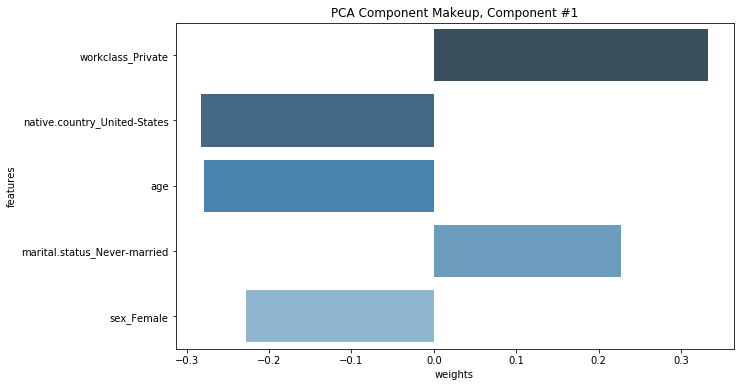

In [52]:
plot_pca(1,5)

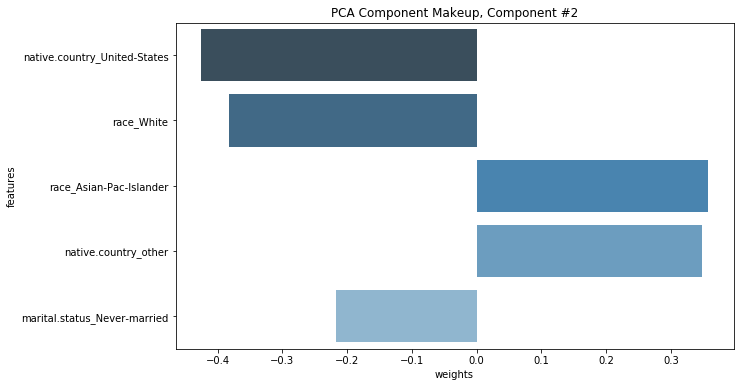

In [51]:
plot_pca(2,5)

### ICA

In [54]:
transformer = FastICA(n_components=7,
        random_state=0)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(32561, 7)

In [55]:
from scipy.stats import norm, kurtosis
kurtosis(X_transformed)

array([ 8.18760249e-01, -1.01196094e+00, -1.49941043e+00,  3.36974946e+00,
        1.55709093e+02,  1.86691347e-02,  2.03706755e+01])

In [60]:
len(transformer.components_[0])

59

In [64]:
kurtosis(X_transformed.flatten())

25.396510863393672

In [65]:
ks = [2,4,6,8,15,20,200,2000]
transformerlarge = FastICA(n_components=70,
        random_state=0)
X_transformed_large = transformerlarge.fit_transform(X_stan)
X_transformed_large.shape

C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:470: UserWarning: n_components is too large: it will be set to 59
  % n_components
C:\Users\zhy89\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


(32561, 59)

In [91]:
ks = [1,2,3,4,5,6,7,8,9,10]#,20,40]
def find_ica(ks,X_stan):
    results = []
    for k in ks:
        transformerlarge = FastICA(n_components=k,
                random_state=0)
        X_transformed_large = transformerlarge.fit_transform(X_stan)
        results.append(kurtosis(X_transformed_large))#.mean()
    return results

In [92]:
results = find_ica(ks,X_stan)

In [95]:
rs = []
for r in results:
    rs.append(r.mean())

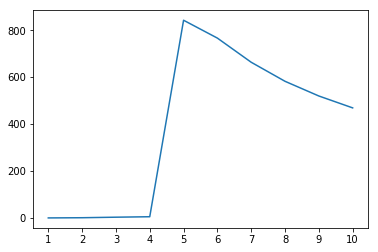

In [97]:
plt.xticks(range(10),ks)
plt.plot(rs)

In [83]:
abs(results[0]).mean()

843.871797516136

In [78]:
results[1]

array([ 1.19963618e+01,  6.05056242e+00, -7.99276857e-01,  2.73595688e+00,
       -8.41243164e-01,  1.34797690e+01,  4.64284307e+03,  2.48657991e+00,
        3.71541541e+00,  5.64983361e+00])

In [85]:
results[2]

array([ 1.36286092e+01, -1.57040290e+00,  5.80648524e+00,  1.21622929e+01,
        8.45796294e-01,  7.81594345e+00,  2.77185315e+00,  4.64353809e+03,
        7.21562802e+01, -7.45043417e-01,  7.94414376e+01,  2.99486149e+00,
        1.70813011e+00,  1.16191953e+01,  3.01981022e+00,  3.72970127e+00,
        1.75546152e+01,  5.64924300e+01,  1.09321764e+01,  8.27395525e+00])

In [209]:
        transformerlarge = FastICA(n_components=5,
                random_state=0)
        X_transformed_large = transformerlarge.fit_transform(X_stan)

In [211]:
len(transformerlarge.components_)

5

In [212]:
import seaborn as sns

def plot_ica(vector_num,top_comp,transformerlarge=transformerlarge):
    v_1 = transformerlarge.components_[vector_num]
    comps = pd.DataFrame(list(zip(v_1, X.columns.values)), 
                             columns=['weights', 'features'])
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(top_comp)
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("ICA Component Makeup, Component #" + str(vector_num))
    plt.show()

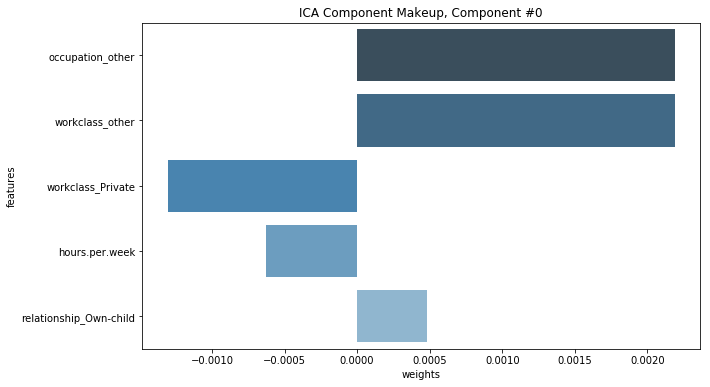

In [213]:
plot_ica(0,5)

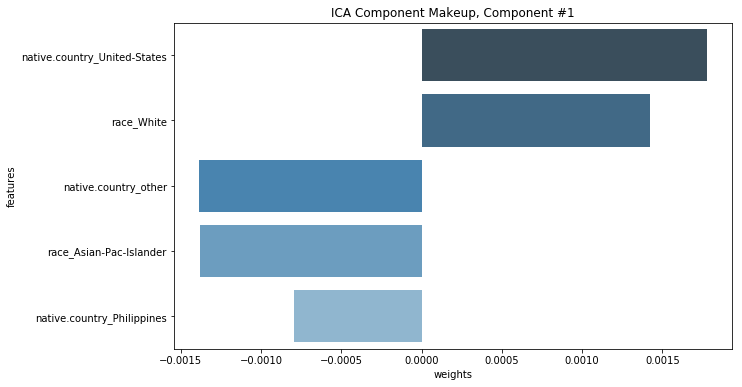

In [214]:
plot_ica(1,5)

### random projection

In [106]:
from sklearn.random_projection import SparseRandomProjection
from sklearn.random_projection import GaussianRandomProjection

rng = np.random.RandomState(42)

gauRP = GaussianRandomProjection(random_state=rng,n_components=5)
SRRp = SparseRandomProjection(random_state=rng,n_components=5)

gau = gauRP.fit_transform(X_stan)
sr = SRRp.fit_transform(X_stan)

In [99]:
transformer = SparseRandomProjection(random_state=rng)


In [100]:
rng = np.random.RandomState(42)


In [109]:
len(gau[1])

5

In [117]:
from scipy.stats import pearsonr
pearsonr(gau[:,0],y)

(0.004669318852331147, 0.39948840322422274)

In [118]:
pearsonr(X_stan[:,0],y)

(0.23403710264885752, 0.0)

In [123]:
np.corrcoef(gau.T)

array([[ 1.        ,  0.00993872, -0.10172551,  0.14054298,  0.17888339],
       [ 0.00993872,  1.        ,  0.03557746, -0.02066124, -0.19777941],
       [-0.10172551,  0.03557746,  1.        ,  0.13525736, -0.156664  ],
       [ 0.14054298, -0.02066124,  0.13525736,  1.        , -0.11233776],
       [ 0.17888339, -0.19777941, -0.156664  , -0.11233776,  1.        ]])

In [124]:
np.corrcoef(gau.T).mean()

0.19288255864365375

In [167]:
rs = []
ks = [2,5,10,15,20,30,50]
ks = [2,3,4,5,6,7,8]
for k in ks:
    
    gauRP = GaussianRandomProjection(random_state=rng,n_components=k)
    #SRRp = SparseRandomProjection(random_state=rng,n_components=5)

    gau = gauRP.fit_transform(X_stan)
    rs.append(np.corrcoef(gau.T))
    

In [202]:
final = []

for r in rs:
    no_1 = np.delete(r.flatten(),np.where(abs(r.flatten()-1)<0.0001))
    final.append(no_1)
    print(abs(r).mean()
    ,abs(no_1).mean())

0.6403786740754456 0.28075734815089115
0.4804464694374658 0.22066970415619866
0.337824341443015 0.11709912192402006
0.2966732189960666 0.1208415237450832
0.2614815672432559 0.11377788069190714
0.2798098460399421 0.15977815371326576
0.24310235240507144 0.13497411703436735


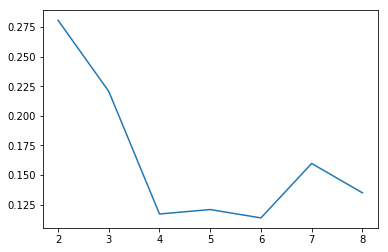

In [206]:
plt.xticks(range(len(ks)),ks)

plt.plot([abs(i).mean() for i in final])

In [207]:
final[0]

array([0.28075735, 0.28075735])

In [ ]:
final

In [139]:
rs[2]

array([[ 1.        , -0.02772   , -0.05071298],
       [-0.02772   ,  1.        , -0.16410308],
       [-0.05071298, -0.16410308,  1.        ]])

In [156]:
abs(np.delete(rs[1].flatten(),np.where(rs[1].flatten()==1))).mean()

0.1515555579568561

In [170]:
rs[0]

array([[1.        , 0.28075735],
       [0.28075735, 1.        ]])

In [171]:
rs[1]

array([[ 1.        ,  0.13893122, -0.33141786],
       [ 0.13893122,  1.        , -0.19166003],
       [-0.33141786, -0.19166003,  1.        ]])

In [198]:
r=rs[0]
abs(np.delete(r.flatten(),np.where(abs(r.flatten()-1)<0.0001)))

array([0.28075735, 0.28075735])

In [193]:
rs[0]

array([[1.        , 0.28075735],
       [0.28075735, 1.        ]])

In [178]:
np.where(r.flatten()==1.0)

(array([0], dtype=int64),)

In [181]:
np.where(np.array([1,1,1])==1)

(array([0, 1, 2], dtype=int64),)

In [184]:
rs[1].flatten()[-1]==1

True

In [185]:
np.where(r.flatten()==1)

(array([0], dtype=int64),)

In [195]:
r.flatten()[-1]==1

False

In [196]:
r.flatten()[-1]

0.9999999999999998

In [221]:
len(gauRP.components_[1])

59

In [220]:
len(gau[0])

8

In [226]:
np.dot(gau,gauRP.components_)

array([[ 1.52728033,  0.39146801, -2.20679248, ...,  4.87810057,
         2.88486553, -0.72385374],
       [ 1.59082937, -0.26242921, -3.84174783, ...,  8.3801579 ,
         2.17716806, -0.63822585],
       [ 2.78571644,  4.54053743, -1.21003996, ...,  8.05376722,
         0.93610003,  0.86619842],
       ...,
       [ 0.50904389, -1.9558814 , -2.03567469, ...,  1.76701068,
        -0.17498889,  1.19058791],
       [ 2.98068916,  0.87754497,  0.51635066, ...,  2.58104647,
        -1.66522965,  2.53961078],
       [-0.4156675 ,  2.06327371,  0.89178231, ...,  1.30649261,
         1.66691293, -0.20532557]])

In [227]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.dot(gau,gauRP.components_), X_stan)


7.6861539865946975

In [242]:
ks = [10,20,30,35,45,50,59]#,20,40]
#ks = [5]
def find_rand_proj(ks=ks,X_stan=X_stan):
    results = []
    for k in ks:
        error = 0
        for i in range(5):
            gauRP = GaussianRandomProjection(random_state=i,n_components=k)
            #SRRp = SparseRandomProjection(random_state=rng,n_components=5)

            gau = gauRP.fit_transform(X_stan)
            transformerlarge = FastICA(n_components=k,
                    random_state=0)
            X_transformed_large = gauRP.fit_transform(X_stan)
            error += mean_squared_error(np.dot(gau,gauRP.components_), X_stan)
        results.append(error/k)
    return results

In [243]:
randp_result = find_rand_proj()

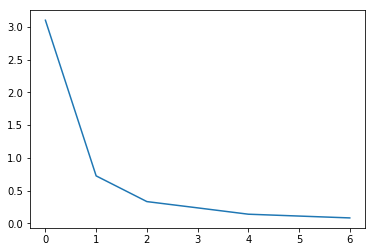

In [244]:
plt.ti
plt.xticks(range(len(ks)),ks)
plt.plot(randp_result)

In [245]:
randp_result

[3.1037082540206162,
 0.724347844481368,
 0.3312539985241669,
 0.23534256678913565,
 0.13837032330372603,
 0.11007636931582258,
 0.08165435456456861]